# Разведочный анализ данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('adult.csv')
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [5]:
# Описание категориальных признаков
df.describe(include=['object'])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

<span style="color:green">Пропуски в данном датасете отображаются как '?' => заменим '?' на Nan и проверим еще раз кол-во пропусков</span>

In [7]:
for col in df.columns:
    unique_vals = df[col].unique()
    if ' ?' in unique_vals or '?' in unique_vals or '? ' in unique_vals:
        df[col] = df[col].replace(' ?', np.nan)
        df[col] = df[col].replace('?', np.nan)
        df[col] = df[col].replace('? ', np.nan)

df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

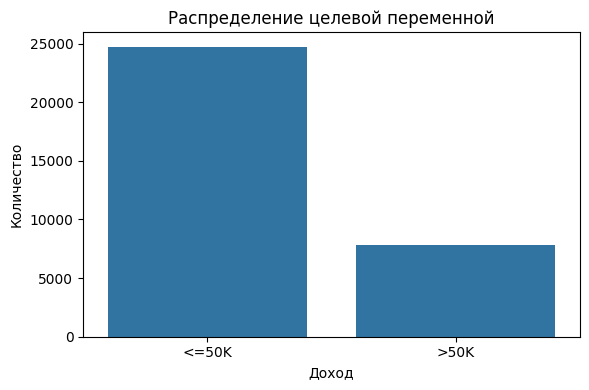

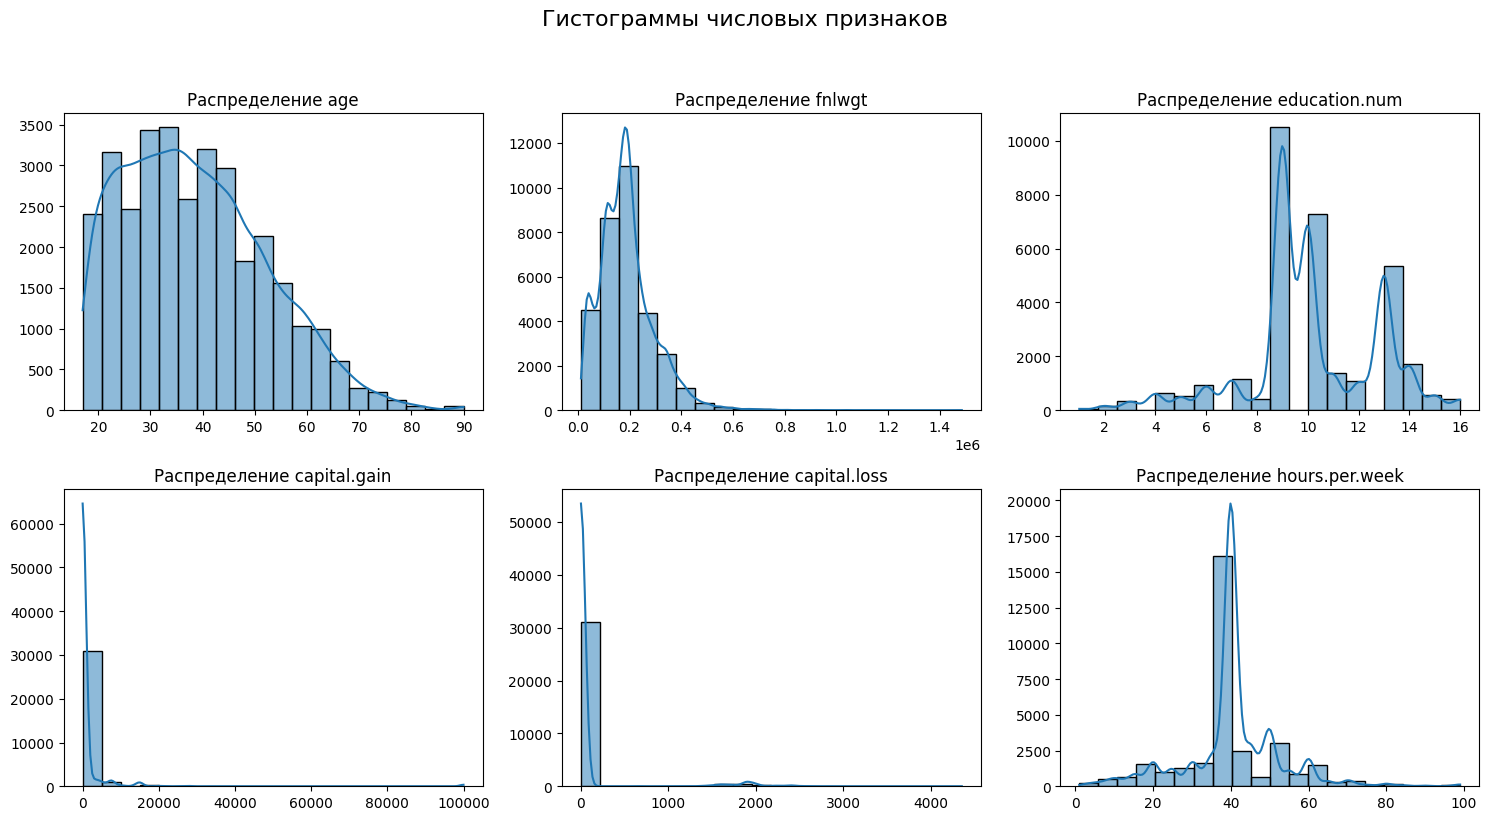

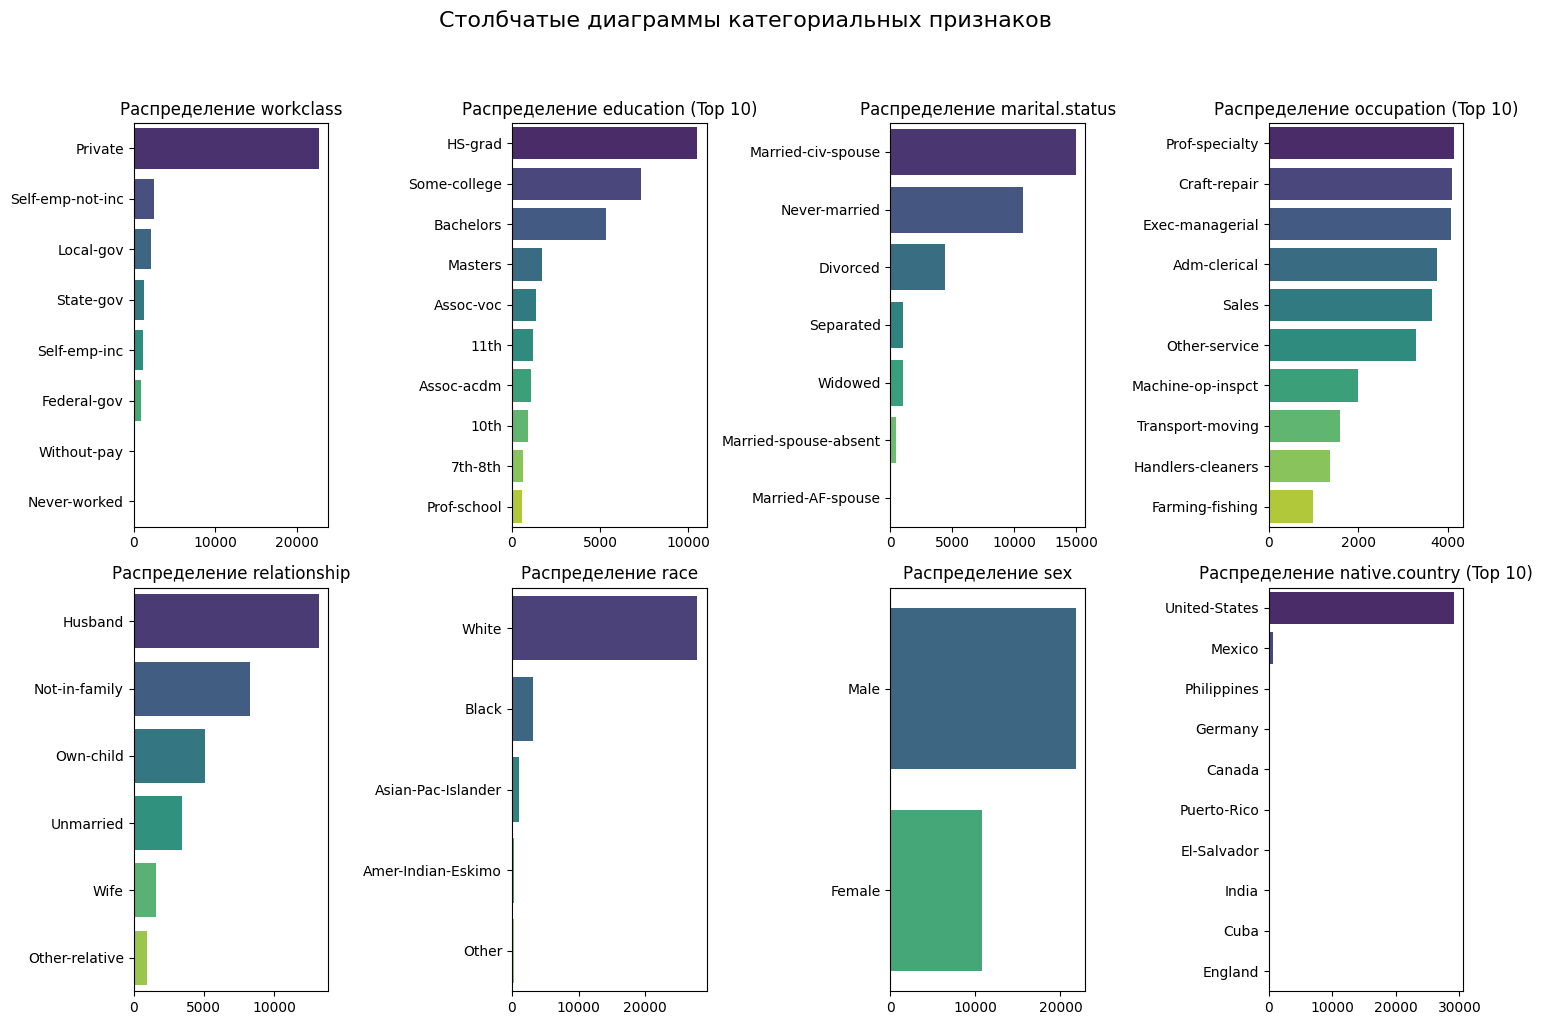

In [8]:
# 1. Распределение целевой переменной
plt.figure(figsize=(6, 4)) # Уменьшим размер
sns.countplot(data=df, x='income')
plt.title('Распределение целевой переменной')
plt.xlabel('Доход')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

# 2. Гистограммы для числовых признаков
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
n_cols_numeric = 3
n_rows_numeric = (len(numerical_cols) - 1) // n_cols_numeric + 1
fig, axes = plt.subplots(n_rows_numeric, n_cols_numeric, figsize=(15, n_rows_numeric * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, ax=axes[i], kde=True)
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.suptitle('Гистограммы числовых признаков', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


# 3. Столбчатые диаграммы для категориальных признаков
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('income')

n_cols_categorical = 4
n_rows_categorical = (len(categorical_cols) - 1) // n_cols_categorical + 1
fig, axes = plt.subplots(n_rows_categorical, n_cols_categorical, figsize=(15, n_rows_categorical * 5)) # Увеличим высоту для читаемости y-меток
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    top_n = 10
    if df[col].nunique() > top_n:
        order = df[col].value_counts().nlargest(top_n).index
        sns.countplot(data=df, y=col, order=order, ax=axes[i], palette="viridis")
        axes[i].set_title(f'Распределение {col} (Top {top_n})')
    else:
        order = df[col].value_counts().index
        sns.countplot(data=df, y=col, order=order, ax=axes[i], palette="viridis")
        axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.suptitle('Столбчатые диаграммы категориальных признаков', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Заполнение пропусков, преобразования признаков

In [9]:
# 1. Заполнение пропусков
cols_to_fill = ['workclass', 'occupation', 'native.country']
for col in cols_to_fill:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)
    print(f"Пропуски в '{col}' заполнены модой: '{mode}'")

Пропуски в 'workclass' заполнены модой: 'Private'
Пропуски в 'occupation' заполнены модой: 'Prof-specialty'
Пропуски в 'native.country' заполнены модой: 'United-States'


In [10]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(categorical_cols)
print(numerical_cols)

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


In [11]:
# Подготовка признаков
from sklearn.preprocessing import StandardScaler, LabelEncoder
# 2. Выбор признаков (удаление 'education' в пользу 'education.num')
df = df.drop('education', axis=1)

# 3. Кодирование целевой переменной 'income'
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])
print(f"\nЦелевая переменная 'income' закодирована. Классы: {le.classes_} -> {le.transform(le.classes_)}")


Целевая переменная 'income' закодирована. Классы: ['<=50K' '>50K'] -> [0 1]


In [12]:
categorical_cols_for_woe = df.select_dtypes(include='object').columns.tolist()
numerical_cols_for_scaling = df.select_dtypes(include=np.number).columns.tolist()
if 'income' in numerical_cols_for_scaling:
    numerical_cols_for_scaling.remove('income')

In [13]:
# 4. Расчет WoE и трансформация категориальных признаков
woe_dfs = []
woe_mappings = {}

def calculate_woe(df, feature_name, target_name):
    # Константа для сглаживания
    smoothing = 0.5
    df_temp = pd.DataFrame({'feature': df[feature_name], 'target': df[target_name]})

    # Количество событий (target=1) и не-событий (target=0)
    total_events = df_temp['target'].sum()
    total_non_events = len(df_temp) - total_events

    # Группируем по значениям признака
    grouped = df_temp.groupby('feature')['target'].agg(['sum', 'count'])
    grouped.rename(columns={'sum': 'events', 'count': 'total_in_category'}, inplace=True)
    grouped['non_events'] = grouped['total_in_category'] - grouped['events']

    # Применяем сглаживание
    grouped['events'] = grouped['events'] + smoothing
    grouped['non_events'] = grouped['non_events'] + smoothing

    dist_events = grouped['events'] / (total_events + smoothing * len(grouped)) # len(grouped) - число категорий
    dist_non_events = grouped['non_events'] / (total_non_events + smoothing * len(grouped))

    # На всякий случай
    dist_events = np.where(dist_events == 0, 0.00001, dist_events)
    dist_non_events = np.where(dist_non_events == 0, 0.00001, dist_non_events)

    grouped['woe'] = np.log(dist_non_events / dist_events)
    return grouped['woe'].to_dict()

df_processed_woe = df.copy()
for col in categorical_cols_for_woe:
    woe_map = calculate_woe(df_processed_woe, col, 'income')
    woe_mappings[col] = woe_map
    df_processed_woe[col + '_woe'] = df_processed_woe[col].map(woe_map)
    df_processed_woe = df_processed_woe.drop(col, axis=1)
    print(f"Столбец {col} заменен на {col}_woe.")

Столбец workclass заменен на workclass_woe.
Столбец marital.status заменен на marital.status_woe.
Столбец occupation заменен на occupation_woe.
Столбец relationship заменен на relationship_woe.
Столбец race заменен на race_woe.
Столбец sex заменен на sex_woe.
Столбец native.country заменен на native.country_woe.


In [14]:
# 5. Масштабирование числовых признаков
if numerical_cols_for_scaling:
    scaler = StandardScaler()
    df_processed_woe[numerical_cols_for_scaling] = scaler.fit_transform(df_processed_woe[numerical_cols_for_scaling])

df_processed_woe.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_woe,marital.status_woe,occupation_woe,relationship_woe,race_woe,sex_woe,native.country_woe
0,3.769612,-1.067997,-0.420060,-0.14592,10.593507,-0.035429,0,0.176396,1.215337,-0.496191,1.015063,-0.080476,0.947732,-0.026044
1,3.183112,-0.539169,-0.420060,-0.14592,10.593507,-1.817204,0,0.176396,1.215337,-1.083686,1.015063,-0.080476,0.947732,-0.026044
2,2.010110,-0.035220,-0.031360,-0.14592,10.593507,-0.035429,0,0.176396,1.215337,-0.496191,1.545002,0.807056,0.947732,-0.026044
3,1.130359,-0.468215,-2.363558,-0.14592,9.461864,-0.035429,0,0.176396,1.002415,0.797703,1.545002,-0.080476,0.947732,-0.026044
4,0.177296,0.709482,-0.031360,-0.14592,9.461864,-0.035429,0,0.176396,1.521269,-0.496191,3.157380,-0.080476,0.947732,-0.026044


In [15]:
print(df_processed_woe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 32561 non-null  float64
 1   fnlwgt              32561 non-null  float64
 2   education.num       32561 non-null  float64
 3   capital.gain        32561 non-null  float64
 4   capital.loss        32561 non-null  float64
 5   hours.per.week      32561 non-null  float64
 6   income              32561 non-null  int64  
 7   workclass_woe       32561 non-null  float64
 8   marital.status_woe  32561 non-null  float64
 9   occupation_woe      32561 non-null  float64
 10  relationship_woe    32561 non-null  float64
 11  race_woe            32561 non-null  float64
 12  sex_woe             32561 non-null  float64
 13  native.country_woe  32561 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 3.5 MB
None


In [16]:
# 6. Расчет Somers' D
from sklearn.metrics import roc_auc_score
target_col_name = 'income'
features_for_somers_d_woe = [col for col in df_processed_woe.columns if col != target_col_name]
somers_d_results_woe = {}

for feature in features_for_somers_d_woe:
    auc = roc_auc_score(df_processed_woe[target_col_name], df_processed_woe[feature])
    somers_d = 2 * (auc - 0.5)
    somers_d_results_woe[feature] = somers_d

somers_d_df_woe = pd.DataFrame(list(somers_d_results_woe.items()), columns=['Признак', "Somers' D"])
somers_d_df_woe.dropna(subset=["Somers' D"], inplace=True)
somers_d_df_woe['Abs Somers\' D'] = somers_d_df_woe["Somers' D"].abs()
somers_d_df_woe = somers_d_df_woe.sort_values(by='Abs Somers\' D', ascending=False).reset_index(drop=True)

print("Somers' D для признаков (с WoE) по отношению к 'income':")
pd.set_option('display.max_rows', None)
print(somers_d_df_woe[['Признак', "Somers' D"]])
pd.reset_option('display.max_rows')


# 7. Отбор признаков по Somers' D > 0.2
threshold_somers_d = 0.2
selected_features_somers_d = somers_d_df_woe[somers_d_df_woe['Abs Somers\' D'] > threshold_somers_d]['Признак'].tolist()

print(f"Признаки, отобранные по |Somers' D| > 0.2")
print(f"Количество отобранных признаков: {len(selected_features_somers_d)}")
print("Список отобранных признаков:")
for f in selected_features_somers_d:
    print(f"- {f} (Somers' D: {somers_d_df_woe[somers_d_df_woe['Признак'] == f]['Somers\' D'].values[0]:.4f})")

Somers' D для признаков (с WoE) по отношению к 'income':
               Признак  Somers' D
0     relationship_woe  -0.558728
1   marital.status_woe  -0.539146
2        education.num   0.433993
3       occupation_woe  -0.414669
4                  age   0.368486
5       hours.per.week   0.344075
6              sex_woe  -0.237662
7         capital.gain   0.179986
8        workclass_woe  -0.141996
9             race_woe  -0.076308
10        capital.loss   0.069592
11  native.country_woe  -0.059207
12              fnlwgt  -0.014499
Признаки, отобранные по |Somers' D| > 0.2
Количество отобранных признаков: 7
Список отобранных признаков:
- relationship_woe (Somers' D: -0.5587)
- marital.status_woe (Somers' D: -0.5391)
- education.num (Somers' D: 0.4340)
- occupation_woe (Somers' D: -0.4147)
- age (Somers' D: 0.3685)
- hours.per.week (Somers' D: 0.3441)
- sex_woe (Somers' D: -0.2377)


In [17]:
# Создаем итоговый DataFrame
df_final_selected = df_processed_woe[selected_features_somers_d + [target_col_name]].copy()
print(df_final_selected.shape)
df_final_selected.head()

(32561, 8)


,relationship_woe,marital.status_woe,education.num,occupation_woe,age,hours.per.week,sex_woe,income
0,1.015063,1.215337,-0.420060,-0.496191,3.769612,-0.035429,0.947732,0
1,1.015063,1.215337,-0.420060,-1.083686,3.183112,-1.817204,0.947732,0
2,1.545002,1.215337,-0.031360,-0.496191,2.010110,-0.035429,0.947732,0
3,1.545002,1.002415,-2.363558,0.797703,1.130359,-0.035429,0.947732,0
4,3.157380,1.521269,-0.031360,-0.496191,0.177296,-0.035429,0.947732,0


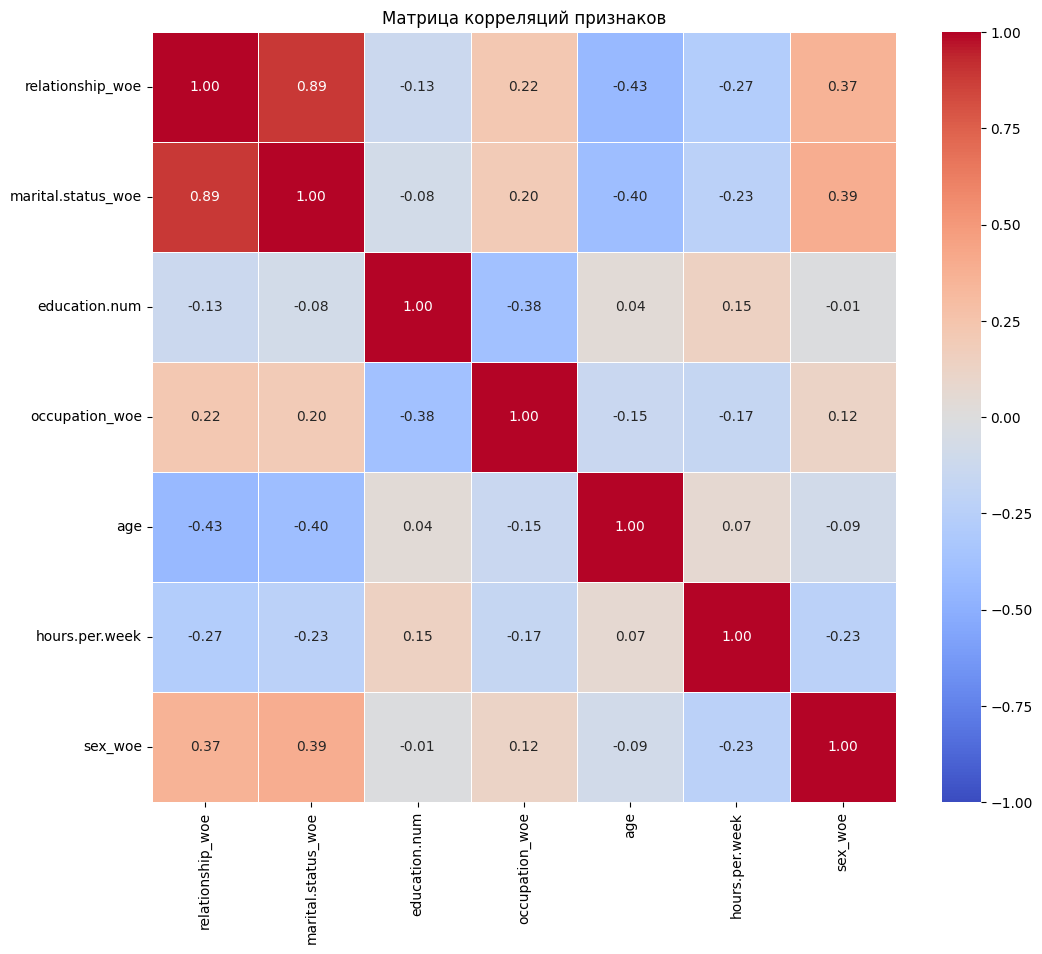

In [22]:
features_df = df_final_selected.drop('income', axis=1)
# Рассчитываем матрицу корреляций
corr_matrix = features_df.corr()

# Визуализация матрицы корреляций 
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.title('Матрица корреляций признаков')
plt.show()

# Разделение на train-test и обучение baseline-моделей

In [23]:
df_final_selected = df_final_selected.drop('marital.status_woe', axis=1)
df = df_final_selected.copy()
from sklearn.model_selection import train_test_split

X = df.drop('income', axis=1)
y = df['income']

# Разделение данных на обучающую и тестовую выборки(сохраняем баланс классов)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52, stratify=y)

print(f"\nРазмер обучающей выборки (X_train): {X_train.shape}")
print(f"Размер тестовой выборки (X_test): {X_test.shape}")
print(f"Распределение 'income' в y_train: \n{y_train.value_counts(normalize=True)}")
print(f"Распределение 'income' в y_test: \n{y_test.value_counts(normalize=True)}")


Размер обучающей выборки (X_train): (22792, 6)
Размер тестовой выборки (X_test): (9769, 6)
Распределение 'income' в y_train: 
income
0    0.75917
1    0.24083
Name: proportion, dtype: float64
Распределение 'income' в y_test: 
income
0    0.759238
1    0.240762
Name: proportion, dtype: float64


In [24]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, recall_score, accuracy_score, confusion_matrix

# Инициализация моделей с параметрами по умолчанию
models = {
    "Logistic Regression": LogisticRegression(random_state=52, max_iter=1000, n_jobs=-1),
    "K-Nearest Neighbors": KNeighborsClassifier(n_jobs=-1),
    "Support Vector Machine": SVC(random_state=52, probability=True),
    "Random Forest": RandomForestClassifier(random_state=52, n_jobs=-1),
    "XGBoost": XGBClassifier(random_state=52, use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
}

baseline_results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    roc_auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)

    baseline_results.append({
        "Модель": model_name,
        "ROC AUC": roc_auc,
        "F1": f1,
        "Recall": recall,
        "Accuracy": accuracy
    })
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

# Преобразование результатов в DataFrame для удобного просмотра
baseline_results_df = pd.DataFrame(baseline_results)
baseline_results_df = baseline_results_df.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)
baseline_results_df

[[6880  537]
 [1103 1249]]
[[6635  782]
 [ 959 1393]]
[[6939  478]
 [1119 1233]]
[[6634  783]
 [1013 1339]]
[[6793  624]
 [ 971 1381]]


,Модель,ROC AUC,F1,Recall,Accuracy
0,XGBoost,0.888155,0.633922,0.587160,0.836728
1,Logistic Regression,0.882622,0.603673,0.531037,0.832122
2,Random Forest,0.855675,0.598570,0.569303,0.816153
3,Support Vector Machine,0.844653,0.606941,0.524235,0.836524
4,K-Nearest Neighbors,0.840356,0.615419,0.592262,0.821783


# Подбор гиперпараметров и оценка оптимальных моделей

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
counts = y_train.value_counts()
scale_pos_weight_val = counts[0] / counts[1] if counts[1] != 0 else 1
class_weight_val = 'balanced'


# Определение моделей и сеток гиперпараметров для GridSearchCV
param_grids = {
    "Logistic Regression": [
        { # Сетка для solver='saga'
            'solver': ['saga'],
            'penalty': ['l1', 'l2'],
            'C': [0.01, 0.1, 1, 10],
            'class_weight': [None, class_weight_val],
            'max_iter': [1000, 2000, 3000]
        },
        { # Сетка для solver='liblinear'
            'solver': ['liblinear'],
            'penalty': ['l1', 'l2'],
            'C': [0.01, 0.1, 1, 10],
            'class_weight': [None, class_weight_val],
            'max_iter': [1000]
        }
    ],
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski', 'manhattan']
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto'],
        'class_weight': [None, class_weight_val]
    },
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'class_weight': [None, class_weight_val, 'balanced_subsample']
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.9],
        'colsample_bytree': [0.7, 0.9],
        'gamma': [0, 0.1],
        'scale_pos_weight': [1, scale_pos_weight_val]
    }
}

base_models_for_grid = {
    "Logistic Regression": LogisticRegression(random_state=52, n_jobs=-1), # max_iter будет из сетки
    "K-Nearest Neighbors": KNeighborsClassifier(n_jobs=-1),
    "Support Vector Machine": SVC(random_state=52, probability=True),
    "Random Forest": RandomForestClassifier(random_state=52, n_jobs=-1),
    "XGBoost": XGBClassifier(random_state=52, use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
}

best_estimators = {}
tuned_model_results = []

for model_name in base_models_for_grid:
    print(f"\nПодбор гиперпараметров для: {model_name}")
    model = base_models_for_grid[model_name]
    grid = param_grids[model_name]
    stratified_kfold_splitter = StratifiedKFold(n_splits=3, shuffle=True, random_state=52)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=stratified_kfold_splitter, scoring='roc_auc', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    print(f"Лучшие параметры для {model_name}: {grid_search.best_params_}")
    print(f"Лучший ROC AUC на CV для {model_name}: {grid_search.best_score_:.4f}")
    best_estimators[model_name] = grid_search.best_estimator_


Подбор гиперпараметров для: Logistic Regression
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Лучшие параметры для Logistic Regression: {'C': 0.01, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
Лучший ROC AUC на CV для Logistic Regression: 0.8767

Подбор гиперпараметров для: K-Nearest Neighbors
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Лучшие параметры для K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Лучший ROC AUC на CV для K-Nearest Neighbors: 0.8593

Подбор гиперпараметров для: Support Vector Machine
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Лучшие параметры для Support Vector Machine: {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
Лучший ROC AUC на CV для Support Vector Machine: 0.8753

Подбор гиперпараметров для: Random Forest
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Лучшие параметры для Random Forest: {'class_weig

In [37]:
tuned_model_results = []
confusion_matrices_tuned = {}

for model_name, tuned_model in best_estimators.items():

    y_pred_proba = tuned_model.predict_proba(X_test)[:, 1]
    y_pred = tuned_model.predict(X_test)

    roc_auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0)
    recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    tuned_model_results.append({
        "Модель": model_name + " (Tuned)",
        "ROC AUC": roc_auc,
        "F1": f1,
        "Recall": recall,
        "Accuracy": accuracy
    })
    confusion_matrices_tuned[model_name + " (Tuned)"] = cm

tuned_results_df = pd.DataFrame(tuned_model_results)
tuned_results_df = tuned_results_df.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)
tuned_results_df

,Модель,ROC AUC,F1,Recall,Accuracy
0,XGBoost (Tuned),0.895514,0.637524,0.573554,0.842973
1,Random Forest (Tuned),0.893857,0.639375,0.574405,0.843996
2,Logistic Regression (Tuned),0.882639,0.601263,0.526361,0.831917
3,Support Vector Machine (Tuned),0.881629,0.592795,0.507228,0.832224
4,K-Nearest Neighbors (Tuned),0.869245,0.623260,0.590136,0.828232


In [38]:
baseline_results_df

,Модель,ROC AUC,F1,Recall,Accuracy
0,XGBoost,0.888155,0.633922,0.587160,0.836728
1,Logistic Regression,0.882622,0.603673,0.531037,0.832122
2,Random Forest,0.855675,0.598570,0.569303,0.816153
3,Support Vector Machine,0.844653,0.606941,0.524235,0.836524
4,K-Nearest Neighbors,0.840356,0.615419,0.592262,0.821783


# Итоговое сравнение результатов

In [45]:
# 1. Подготовка данных для сравнения
baseline_results_df['Base Model Name'] = baseline_results_df['Модель']
tuned_results_df['Base Model Name'] = tuned_results_df['Модель'].str.replace(' \(Tuned\)', '', regex=True)

# 2. Объединение DataFrame'ов
comparison_df = pd.merge(
    baseline_results_df,
    tuned_results_df,
    on='Base Model Name',
    suffixes=('_baseline', '_tuned')
)

# Выбираем и переименовываем нужные столбцы для итоговой таблицы сравнения
comparison_df = comparison_df[[
    'Base Model Name',
    'ROC AUC_baseline', 'ROC AUC_tuned',
    'F1_baseline', 'F1_tuned',
    'Recall_baseline', 'Recall_tuned',
    'Accuracy_baseline', 'Accuracy_tuned'
]]
comparison_df.rename(columns={'Base Model Name': 'Модель'}, inplace=True)

# Рассчитаем улучшение для ROC AUC
comparison_df['ROC AUC Improvement'] = comparison_df['ROC AUC_tuned'] - comparison_df['ROC AUC_baseline']
comparison_df['F1 Improvement'] = comparison_df['F1_tuned'] - comparison_df['F1_baseline']
comparison_df

,Модель,ROC AUC_baseline,ROC AUC_tuned,F1_baseline,F1_tuned,Recall_baseline,Recall_tuned,Accuracy_baseline,Accuracy_tuned,ROC AUC Improvement,F1 Improvement
0,XGBoost,0.888155,0.895514,0.633922,0.637524,0.587160,0.573554,0.836728,0.842973,0.007359,0.003601
1,Logistic Regression,0.882622,0.882639,0.603673,0.601263,0.531037,0.526361,0.832122,0.831917,0.000017,-0.002411
2,Random Forest,0.855675,0.893857,0.598570,0.639375,0.569303,0.574405,0.816153,0.843996,0.038182,0.040806
3,Support Vector Machine,0.844653,0.881629,0.606941,0.592795,0.524235,0.507228,0.836524,0.832224,0.036976,-0.014146
4,K-Nearest Neighbors,0.840356,0.869245,0.615419,0.623260,0.592262,0.590136,0.821783,0.828232,0.028889,0.007841


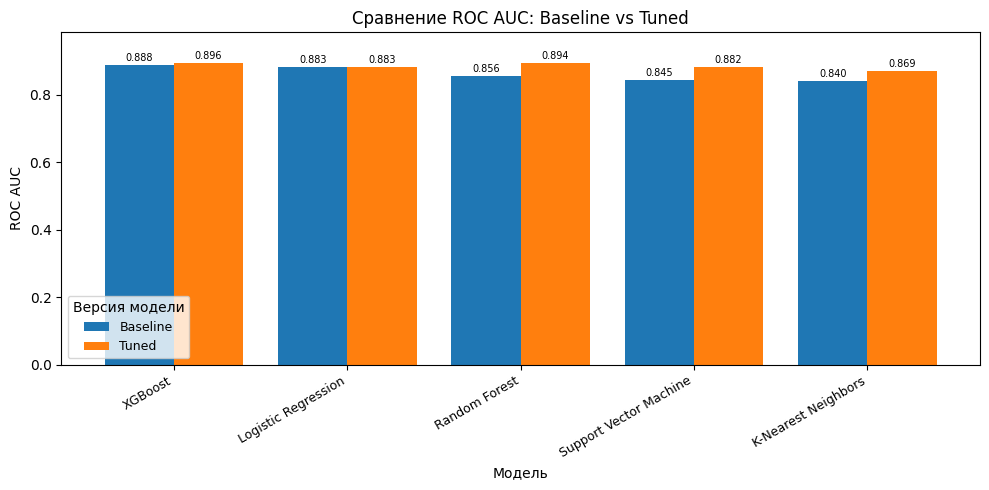

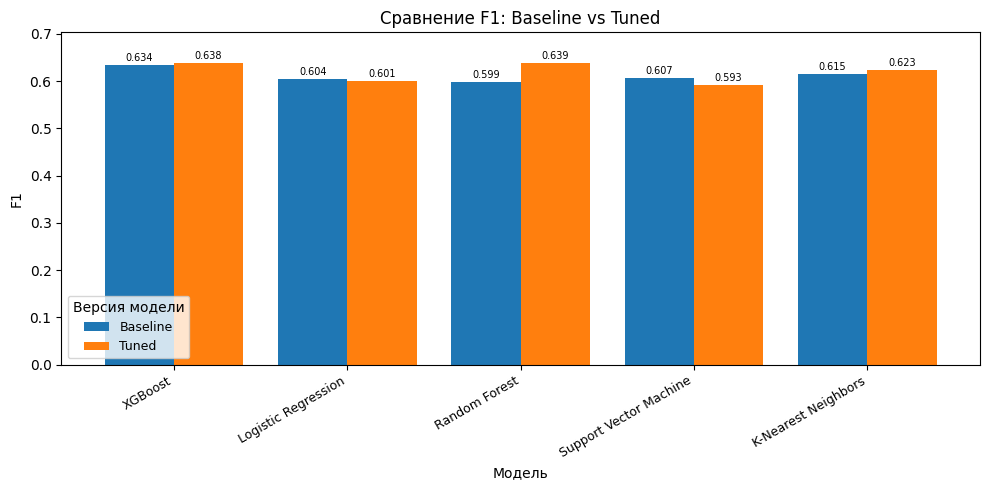

In [50]:
# 3. Визуализация сравнения
metrics_to_plot = ['ROC AUC', 'F1']
n_models = len(comparison_df['Модель'])

for metric_base_name in metrics_to_plot:
    metric_baseline_col = f'{metric_base_name}_baseline'
    metric_tuned_col = f'{metric_base_name}_tuned'

    plot_df = comparison_df[['Модель', metric_baseline_col, metric_tuned_col]].copy()
    plot_df.set_index('Модель', inplace=True)
    plot_df.rename(columns={metric_baseline_col: 'Baseline', metric_tuned_col: 'Tuned'}, inplace=True)

    ax = plot_df.plot(kind='bar', figsize=(10, 5), width=0.8)
    plt.title(f'Сравнение {metric_base_name}: Baseline vs Tuned', fontsize=12)
    plt.ylabel(metric_base_name, fontsize=10)
    plt.xticks(rotation=30, ha="right", fontsize=9)
    plt.legend(title='Версия модели', fontsize=9)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points', 
                    fontsize=7)
    plt.ylim(top=plot_df.max().max() * 1.1)
    plt.show()

### Лучший результат по ROC_AUC: XGBoost
### Лучший результат по F1: Random Forest
### Лучший рост по ROC_AUC: Random Forest
### Лучший рост по F1: Random Forest
### Подбор гиперпараметров в большинстве случаев привел к улучшению или сохранению качества моделей по ключевым метрикам (ROC AUC, F1-score)